# Programming Exercise 7: K-means Clustering and Principal Component Analysis 

In [1]:
from __future__ import division
from IPython.utils import io 
import numpy as np
import numpy.random as npr
import scipy as sp
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.optimize as sop
import os as os 

import random
import scipy.misc as sm

%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Sharp plots  

data_dir="C:/GitHub/ML_Coursera/ex7/data"

## A: Supporting Functions

In [2]:
# Return the contents of the data file
def load_data(data_dir,f_name):                       
    os.chdir(data_dir)
    data=sio.loadmat(f_name)
    return data

## 1 K-means Clustering 

## 1.1 Implementing K-means

In [3]:
data=load_data(data_dir,'ex7data2.mat')
data.keys()

['X', '__version__', '__header__', '__globals__']

In [4]:
X=data['X']
initial_Centroids=(np.r_[[3,3],[6,2],[8,5]]).reshape((3,2))
print initial_Centroids,initial_Centroids.shape,X.shape

[[3 3]
 [6 2]
 [8 5]] (3L, 2L) (300L, 2L)


### 1.1.1 Finding closest centroids

In [5]:
def findClosestCentroids(x_mat, mu_mat):
    '''
    Lets subtract x[i] from mu_mat #lovenumpy
    get the squared distance and 
    obtain the minmum argument is the distance array
    ''' 
    m=x_mat.shape[0]
    c=np.zeros(m)
    for i in range(m):
        dist_mat=np.sum((x_mat[i]-mu_mat)**2,axis=1)    
        x_id=np.argmin(np.sum((x_mat[i]-mu_mat)**2,axis=1),axis=0)
        c[i]=x_id
    return c.astype(int)

idx=findClosestCentroids(X,initial_Centroids)


print 'The first 3 entries are associated with clusters: ', idx[0:3], 'respectively.',"\n", \
'Note:Indices start with 0 in Python so matlab_outpt of [1 3 2] is equivalent to [0 2 1] in Python.'    

The first 3 entries are associated with clusters:  [0 2 1] respectively. 
Note:Indices start with 0 in Python so matlab_outpt of [1 3 2] is equivalent to [0 2 1] in Python.


[[3 3]
 [6 2]
 [8 5]]


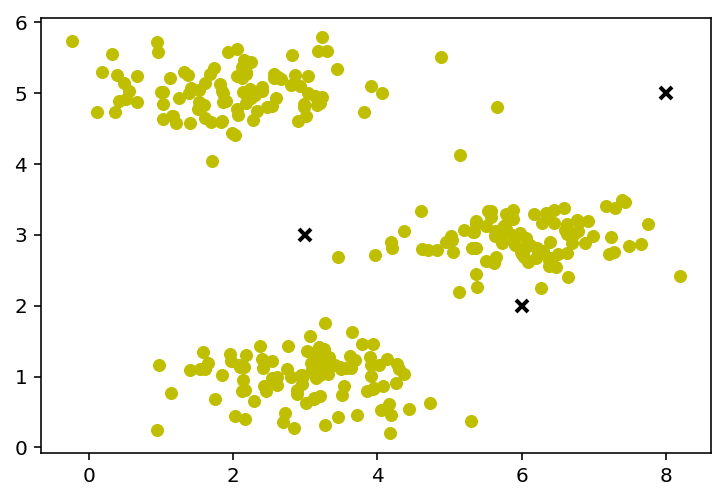

In [6]:
# Lets plot the the data and the provided centroid 
print initial_Centroids
plt.plot(X[:,0],X[:,1],'yo',mew=0.5)
plt.plot(initial_Centroids[:,0],initial_Centroids[:,1],'kx',mew=2)

### 1.1.2 Computing centroid means

In [7]:
def computeCentroids(x_mat, idx, mu_mat):
    k=mu_mat.shape[0]
    k_x=[[] for i in range(k)]
    
    for j in range(x_mat.shape[0]):
        k_x[idx[j]].append(x_mat[j])
    new_mu_mat=np.zeros(mu_mat.shape)
    for l in range(k):
        ar = np.array(k_x[l])
        new_mu_mat[l]=np.mean(ar,axis=0)
    return new_mu_mat,k_x

mu_mat,k_x=computeCentroids(X, idx, initial_Centroids)
print initial_Centroids.flatten(), '\n', mu_mat.flatten()

[3 3 6 2 8 5] 
[ 2.42830111  3.15792418  5.81350331  2.63365645  7.11938687  3.6166844 ]


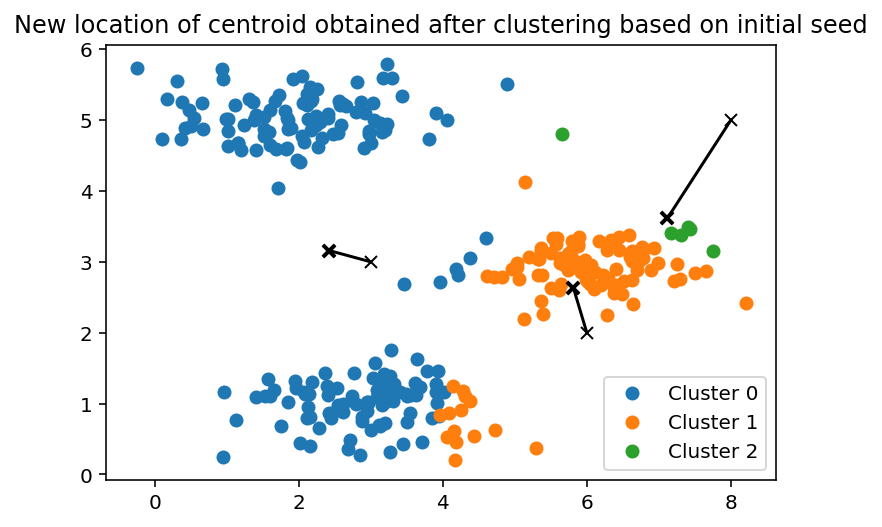

In [8]:
''' 
Lets plot the new Data to see if the new position of centroid. This plot 
helped me identify the error in the compteCentroids funciton which was o/p integers.
'''
for i in range(len(k_x)):
    arr=np.array(k_x[i])
    plt.plot(arr[:,0] ,arr[:,1], 'o', label='Cluster '+str(i))
    xx=[initial_Centroids[i,0],mu_mat[i,0]]
    yy=[initial_Centroids[i,1],mu_mat[i,1]]
    plt.plot(xx,yy,'k-x')
    
plt.plot(mu_mat[:,0],mu_mat[:,1],'kx',mew=2)
plt.legend()
plt.title('New location of centroid obtained after clustering based on initial seed')

## 1.2 K-means on example dataset

In [9]:
def runKmeans(X,initial_Centroids,n_iter=10):                   # Kmeans algorithm
    mu_mat=initial_Centroids
    mu_list=[initial_Centroids]
    for i in range(n_iter):
        idx=(findClosestCentroids(X, mu_mat)).astype(int)   
        mu_mat,k_x=computeCentroids(X, idx, mu_mat)
        mu_list.append(mu_mat)
    return mu_list,k_x
mu_list,k_x = runKmeans(X,initial_Centroids)

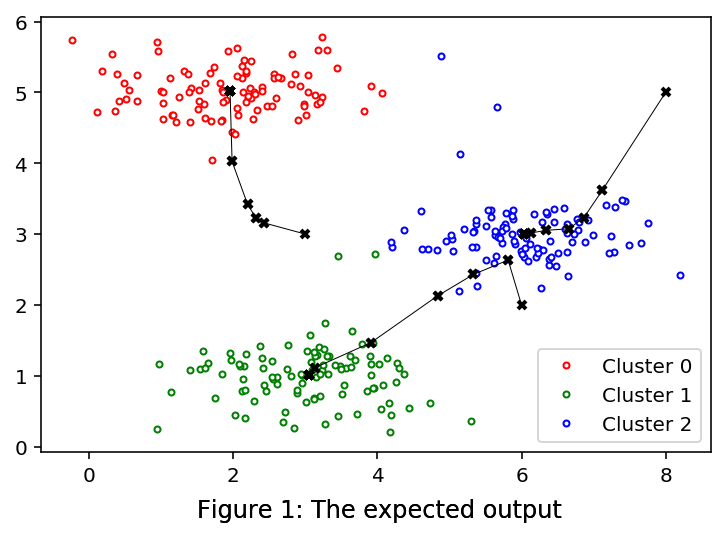

In [10]:
def KmeansPlot(k_x,mu_list):              # Plotting routine with format
    cl=['ro','go','bo']
    K=len(k_x)
    for i in range(len(k_x)):
        arr=np.array(k_x[i])
        plt.plot(arr[:,0] ,arr[:,1], cl[i], mfc='w', label='Cluster '+str(i), ms=3)
    plt.legend()
    for i in range(len(mu_list)-1):
        for j in range(K):
            xx=[mu_list[i][j,0],mu_list[i+1][j,0]]
            yy=[mu_list[i][j,1],mu_list[i+1][j,1]]
            plt.plot(xx,yy,'k-x',mew=2,ms=4,linewidth=0.5)
plt.text(1.5,-1,'Figure 1: The expected output', fontsize=12)
    
KmeansPlot(k_x,mu_list)
plt.text(1.5,-1,'Figure 1: The expected output', fontsize=12)

## 1.3 Random Initialization

In [11]:
def kMeansInitCentroids(X,k):
    m, n = X.shape[0], X.shape[1]
    centroid=np.zeros((k,n)) 
    randidx=random.sample(range(m),k)
    centroids=X[randidx]
    return centroids

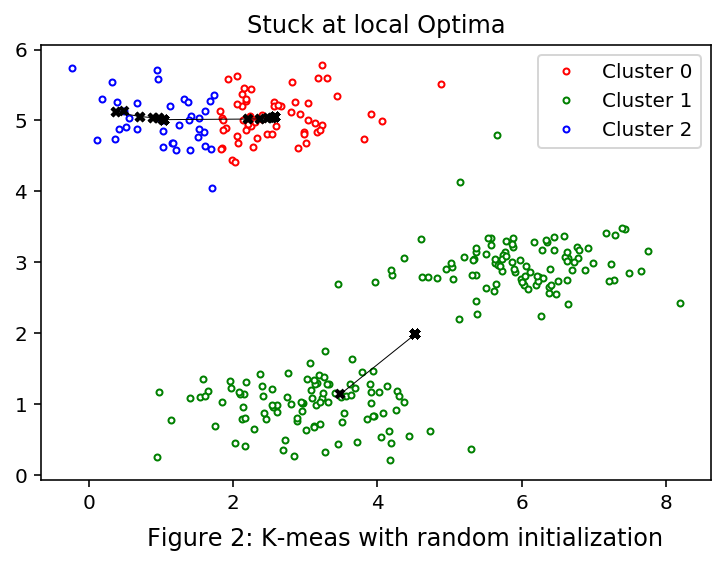

In [12]:
'''
Stored co-ordinates for intial seed for centroids where K-means got stuck at local optima. 
The co-ordinates were obtained by randombly initializing the seed in prior runs.
'''
k=3
# Centroids=kMeansInitCentroids(X,k)
Centroids=np.array([[ 1.02285128,  5.0105065 ],             
       [ 3.48444387,  1.13551448],
       [ 0.47647355,  5.13535977]])
mu_list,k_x=runKmeans(X,Centroids)
KmeansPlot(k_x,mu_list)
plt.title("Stuck at local Optima")
plt.text(0.8,-1,'Figure 2: K-meas with random initialization', fontsize=12)

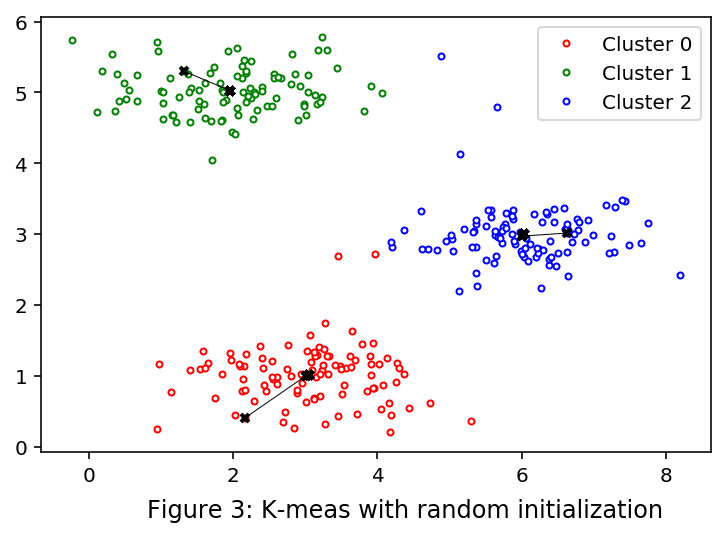

In [13]:
k=3
Centroids=kMeansInitCentroids(X,k)
mu_list,k_x=runKmeans(X,Centroids)
KmeansPlot(k_x,mu_list)
plt.text(0.8,-1,'Figure 3: K-meas with random initialization', fontsize=12)

## 1.4 Image compression with K-means

### K-means on pixels

(128L, 128L, 3L)


180

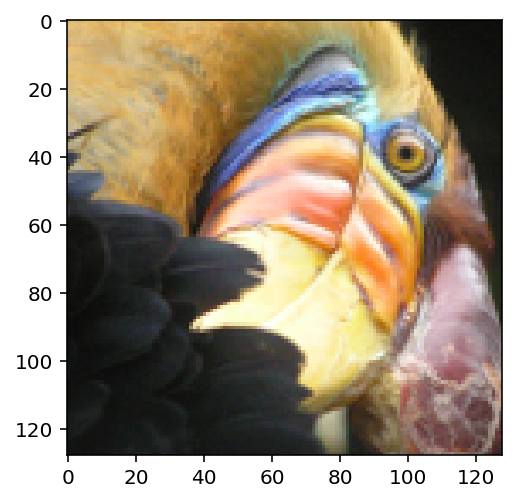

In [14]:
# Lets see the image
A=sm.imread('bird_small.png')
print A.shape
plt.imshow(A)
A[0,10,1]

In [15]:
img_size=A.shape
norm_A=A/255                                   # Normalize the matrix
X_mat=norm_A.reshape(A.shape[0]*A.shape[1],3)  # Unroll into a vector      
K=16                                           # Number of clusters
max_iters=10
ic=kMeansInitCentroids(X_mat,K)
mu_list,k_x=runKmeans(X_mat,ic,n_iter=max_iters)
#KmeansPlot(k_x,mu_list)

In [16]:
idx=findClosestCentroids(X_mat,mu_list[-1])
idx,mu_list[-1]
reduced_image=np.zeros((idx.shape[0],3))
for i in range(reduced_image.shape[0]):
    reduced_image[i]=mu_list[-1][idx[i]]

In [17]:
# Number of unique color values
import sys
print "Unique number of colors in reduced image: ", len(np.unique(reduced_image[:,1]))
print "Unique number of colors in original image: : ",len(np.unique(A[:2]))
print "Reduced Image Size: ",sys.getsizeof(reduced_image)
print "Reduced Image Size: ",sys.getsizeof(A)
print np.unique(reduced_image[:,1])

Unique number of colors in reduced image:  16
Unique number of colors in original image: :  194
Reduced Image Size:  393328
Reduced Image Size:  49280
[ 0.07225787  0.10281426  0.14817865  0.21211171  0.3047858   0.395796
  0.44120237  0.51311943  0.54288425  0.58300654  0.61394254  0.70111528
  0.74502812  0.80483435  0.89571517  0.96046544]


Is the array size of the reduced image is higher? In its current form, yes. The value of the colors are normalized so they are floats and take more memory. We  can instead store those values in separte array and replace floats with the index of the colors that would require 4 bits. While plotting the image we can access the actual color values using the index from our stored color array. However, this is not the part of the exercise so may be I will implement this when I find time.

It is important to know what is going on, so I chose to mention it.

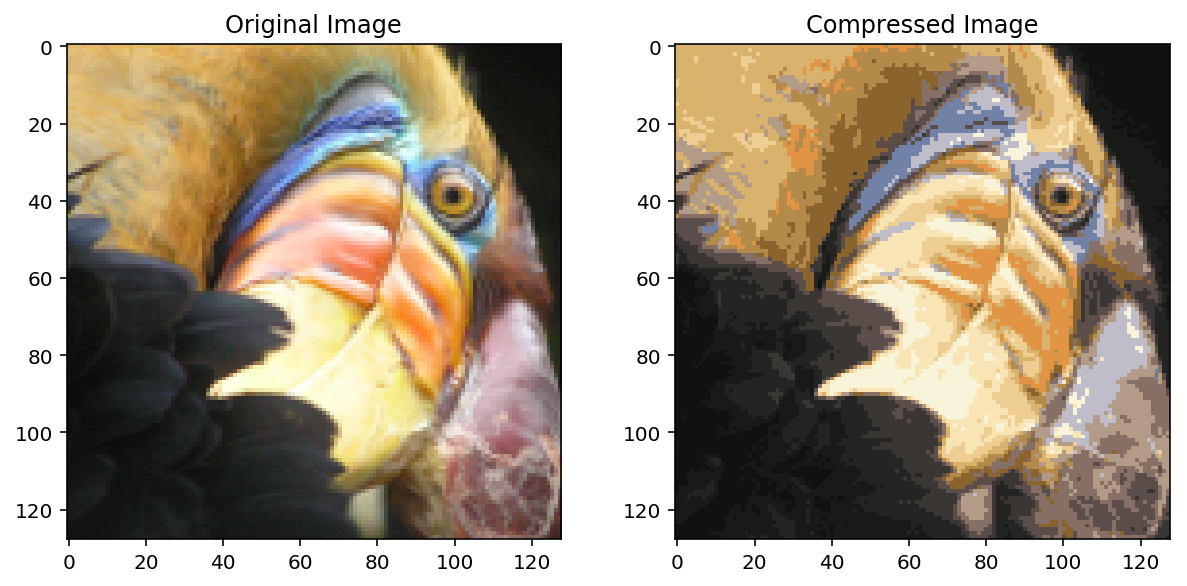

In [18]:
# Lets plot 2 images to see if there is substanstial difference.
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(A)
plt.title('Original Image')
plt.subplot(222)
plt.imshow(reduced_image.reshape(128,128,3))
plt.title('Compressed Image')

## 2 Principle Componenet Analysis

## 2.1 Example Dataset

In [19]:
data=sio.loadmat('ex7data1.mat')
data.keys()

['X', '__version__', '__header__', '__globals__']

In [20]:
X=data['X']
print 'X.shape: ',X.shape

X.shape:  (50L, 2L)


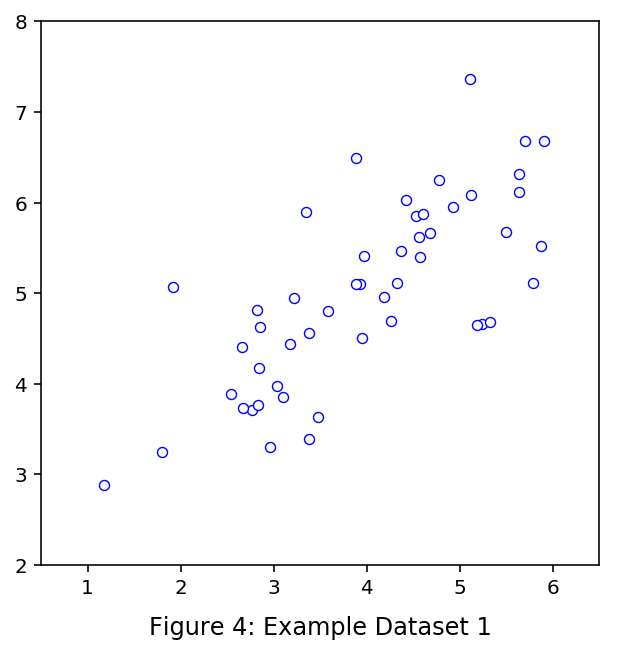

In [21]:
plt.figure(figsize=(5,5))
plt.plot(X[:,0],X[:,1],'bo',mfc='w',ms=5,mew=0.7)
plt.axis([0.5, 6.5, 2, 8],'square')
plt.title("Figure 4: Example Dataset 1",y=-0.15)

## 2.2 Implementing PCA

In [22]:
# ref: https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html
def featureNormalize(X):
    mu     = np.mean(X,axis=0)
    sigma  = np.std(X,axis=0)
    X_norm = X-mu
    X_ns = X_norm/sigma                    # normalized and scaled X
    return X_ns, mu, sigma

def covaraince_mat(X):
    m       = X.shape[0]
    cov_mat = np.matmul(X.T,X)/m
    return cov_mat

X_ns, mu, sigma   = featureNormalize(X)
cov_mat           = covaraince_mat(X_ns)
U, s, V           = np.linalg.svd(cov_mat)
print "The first principle component is: ", U[:,0]

The first principle component is:  [-0.70710678 -0.70710678]


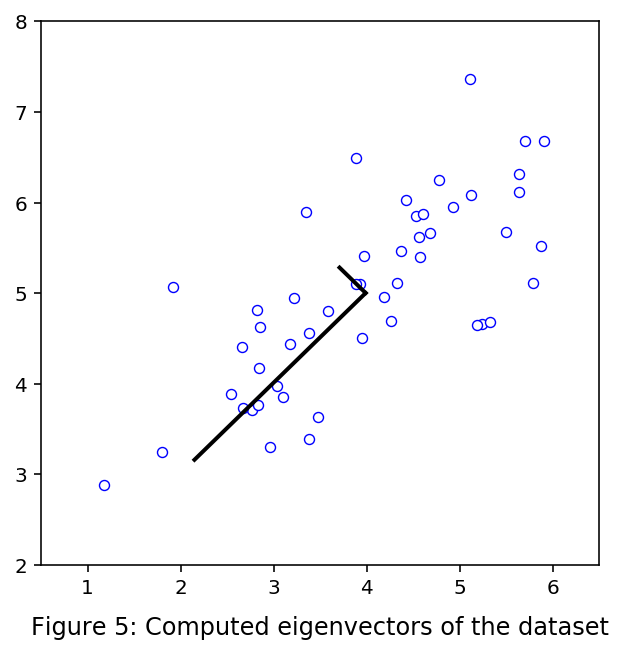

In [23]:
# Lets plot the eigen vecotors 
pc1=1.5*s[0]*U[:,0]
pc2=1.5*s[1]*U[:,1]

plt.figure(figsize=(5,5))
plt.plot(X[:,0],X[:,1],'bo',mfc='w',ms=5,mew=0.7)
plt.axis([0.5, 6.5, 2, 8],'square')
plt.title("Figure 5: Computed eigenvectors of the dataset",y=-0.15)
plt.plot([mu[0],mu[0]+pc1[0]],[mu[1],mu[1]+pc1[1]],'k-',  lw=2)
plt.plot([mu[0],mu[0]+pc2[0]],[mu[1],mu[1]+pc2[1]],'k-',  lw=2)

## 2.3 Dimensionality Reduction with PCA

### 2.3.1 Projecting the data onto the principal components

In [24]:
def projectData(x, U, K):
    U_reduced = U[:,:K]
    z=np.matmul(x,U_reduced)
    return z
z = projectData(X_ns,U,1)
print 'Projection of the first examle: ',z[0][0]

Projection of the first examle:  1.49631260846


### 2.3.2 Reconstructing an approximation of the data

In [25]:
def recoverData(z,U,K,mu,sigma):
    U_reduced=U[:,:K]
    x_ns_app=np.matmul(z,U_reduced.T)
    x_approx=x_ns_app*sigma+mu 
    return x_approx

x_approx=recoverData(z,U,1,mu,sigma)            # Revert back to X
print 'Approximation of the first example: ',x_approx[0]

Approximation of the first example:  [ 2.76059072  3.93086928]


## 2.3.3 Visualizing the projections

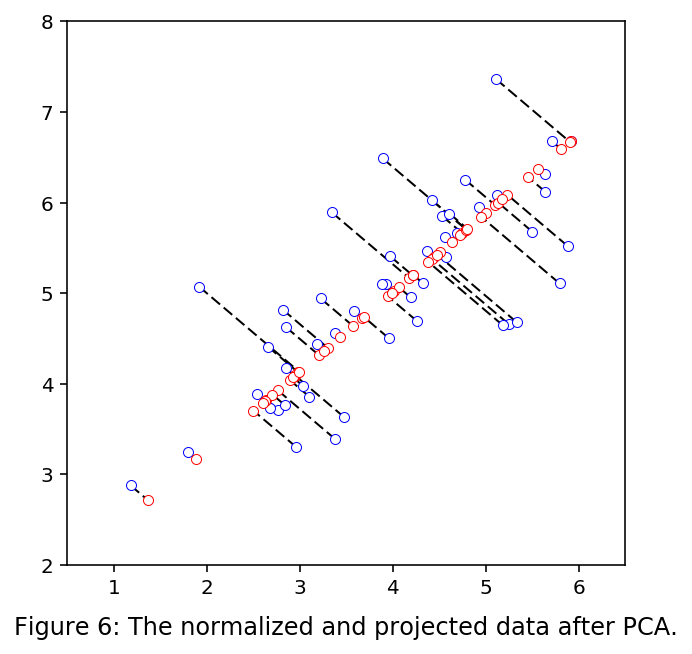

In [26]:
# Lets plot the x_approx
plt.figure(figsize=(5,5))
plt.axis([0.5, 6.5, 2, 8],'square')
for i in range(x_approx.shape[0]):
    plt.plot([X[i,0],x_approx[i,0]],[X[i,1],x_approx[i,1]], 'k--', lw=1)
plt.plot(X[:,0],X[:,1],'bo',mfc='w',ms=5,mew=0.5)
plt.plot(x_approx[:,0],x_approx[:,1],'ro',mfc='w',ms=5,mew=0.5)
plt.title("Figure 6: The normalized and projected data after PCA.",y=-0.15)

## 2.4 Face Image Dataset

In [27]:
faces=sio.loadmat('ex7faces.mat')
print faces.keys()

['X', '__version__', '__header__', '__globals__']


In [28]:
X=faces['X']
X.shape

(5000L, 1024L)

Random Examples from the Data set:


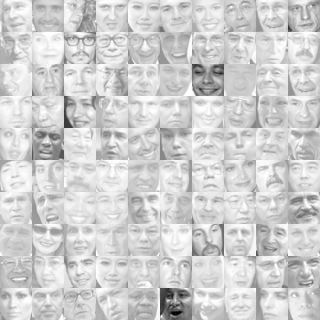

In [29]:
def generate_img(X,n):
    r,c=32,32
    a=X[n]
    mat_a=np.transpose((a/max(a)).reshape((r,c)))  # Take transpose to make numbers properly
    return mat_a

def displayData(X):
    print "Random Examples from the Data set:"
    w, h = 32, 32
    rand=((X.shape[0]*npr.random(100)).astype(int)).reshape(10,10)  # Generate a 10,10 grid of random numbers [0,5000)
    pic=np.zeros((w*10,h*10))
    for i in range(10):
        for j in range(10):
            mat_a=generate_img(X,rand[i][j])
            pic[32*i:32*(i+1),32*j:32*(j+1)]=mat_a    # big_mat[row_range,col_range]=small_mat
    return sm.toimage(pic,mode='L')                  # 'L' for Grey Scale   
displayData(X)

### 2.4.1 PCA on Faces

In [30]:
X_ns, mu, sigma   = featureNormalize(X)
cov_mat           = covaraince_mat(X_ns)
U, s, V           = np.linalg.svd(cov_mat)

Random Examples from the Data set:


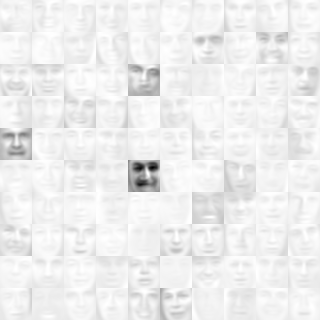

In [31]:
z = projectData(X_ns,U,36)
x_approx=recoverData(z,U,36,mu,sigma) 
displayData(x_approx)